In [ ]:
Q1. Design and implement a K-means clustering model with hyperparameter tuning using scikit-learn, 
and evaluate its performance using various performance measures for a specific clustering task.

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("driver-data.csv", index_col="id")
data.head()

,mean_dist_day,mean_over_speed_perc
id,,
3423311935,71.24,28
3423313212,52.53,25
3423313724,64.54,27
3423311373,55.69,22
3423310999,54.58,25


In [3]:
#Import kmeans library from sklearn
from sklearn.cluster import KMeans

In [4]:
#considering n to be 4
n=4
kmeans = KMeans(n_clusters=n)

In [5]:
kmeans.fit(data)

KMeans(n_clusters=4)

In [6]:
kmeans.cluster_centers_

array([[177.83509615,  70.28846154],
       [ 49.98428468,   5.21441441],
       [ 50.46127059,  32.42823529],
       [180.34311782,  10.52011494]])

In [7]:
kmeans.labels_

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

In [8]:
unique, counts = np.unique(kmeans.labels_, return_counts=True)

# Convert dictionary keys and values to standard integers
dict_data = {int(k): int(v) for k, v in zip(unique, counts)}
dict_data


{0: 104, 1: 2775, 2: 425, 3: 696}

In [9]:
import seaborn as sns

In [10]:
data["cluster"] = kmeans.labels_

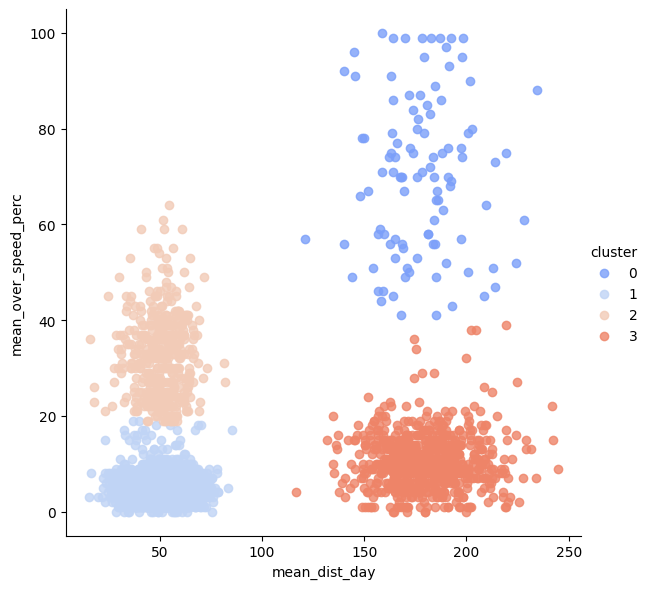

In [11]:
sns.lmplot(
    x='mean_dist_day', 
    y='mean_over_speed_perc', 
    data=data, 
    hue='cluster', 
    palette='coolwarm', 
    height=6, 
    aspect=1, 
    fit_reg=False
)


In [12]:
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

719601.5383469039

In [13]:
data

,mean_dist_day,mean_over_speed_perc,cluster
id,,,
3423311935,71.24,28,2
3423313212,52.53,25,2
3423313724,64.54,27,2
3423311373,55.69,22,2
3423310999,54.58,25,2
...,...,...,...
3423310685,160.04,10,3
3423312600,176.17,5,3
3423312921,170.91,12,3
